Author: Amelia Xie

Date(s): 17/9/22, 18/9/22

17/9/22

# Research background and aim
We will look at the dataset corresponding to participant 4 with the goal of analysing the step counts of participants in a week.

Let's load in the data

In [3]:
import pandas as pd
url = "../../../datasets/Participant-04.csv"
p4 = pd.read_csv(url)

Let's have a look at the dataset

In [4]:
p4.head(10)

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
5,01-Jan-2022 05:00,01-Jan-2022 06:00,0.0
6,01-Jan-2022 06:00,01-Jan-2022 07:00,0.0
7,01-Jan-2022 07:00,01-Jan-2022 08:00,107.0
8,01-Jan-2022 08:00,01-Jan-2022 09:00,293.0
9,01-Jan-2022 09:00,01-Jan-2022 10:00,511.0


In [5]:
p4.describe()

,Steps (count)
count,6023.000000
mean,479.807881
std,1111.769551
min,0.000000
25%,0.000000
50%,133.797022
75%,462.000000
max,9322.137698


Participant 4 walks an average of 480 steps per hour, however there is high variance in step counts. At least 25% of hours did not have any activity recorded, while the highest number of steps recorded was 9322. 

I should check if there are any values that require data engineering.

In [6]:
p4.isna().any()

Start            False
Finish           False
Steps (count)    False
dtype: bool

There does not appear to be any missing or invalid values in the data. 

Since I am analysing trends across a week, it would make sense to convert the dates into week format. I will create a new column for the days of the week and group them together.

In [7]:
p4['Start'] = pd.to_datetime(p4['Start'])
p4['Day of week'] = p4['Start'].dt.day_name()
# 24/9/22
p4["Steps (count)"] = round(p4["Steps (count)"])
p4["Steps (count)"] = p4["Steps (count)"].astype(int)
#convert step counts to whole numbers
week_count = p4.groupby(['Day of week'])['Steps (count)'].sum()
week_count 

Day of week
Friday       318868
Monday       317481
Saturday     783599
Sunday       334801
Thursday     416447
Tuesday      395820
Wednesday    322864
Name: Steps (count), dtype: int32

It appears that this participant is most active on Saturdays and the least active on Fridays, although the step counts for other days seem to be fairly consistent. We should plot the data to better identify the trends within each day.

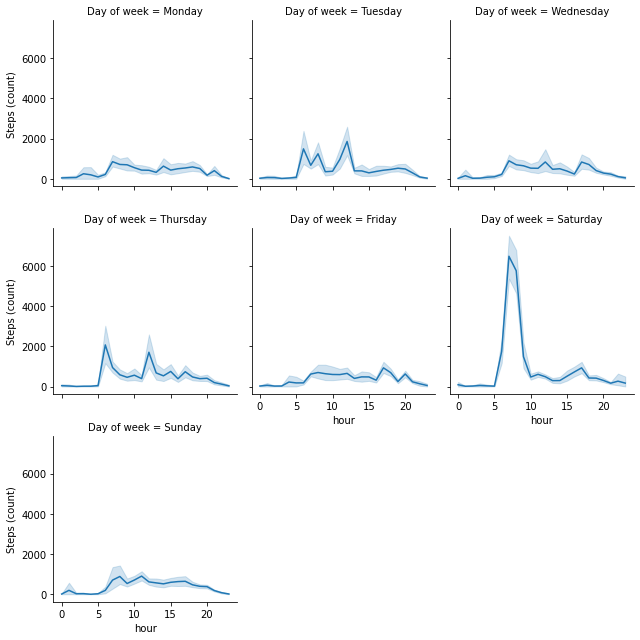

In [8]:
import seaborn as sns
p4['hour'] = p4['Start'].dt.hour
p4['date'] = p4['Start'].dt.date
dest = '../../../datasets/Modified_dataset04.csv'
# 24/9/22
p4.to_csv(dest) #saving a csv to do future analyses on
#
plot = sns.FacetGrid(p4, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.lineplot, "hour", "Steps (count)")

18/09/22

It appears that the peak activity is recorded in the morning, between 5 - 10 am, especially on Saturday, where the peak appears to be 4 times higher than usual. There is also a peak in the afternoon, especially noticable on Tuesdays, Wednesdays and Thursdays.